# Gradient Descent(경사 하강법)

*   머신 러닝의 목적은 비용(손실) 함수를 최소로 만드는 파라미터들(w0, w1, w2, ...)을 찾는 것.
*   회귀 문제인 경우 비용(손실) 함수는 MSE(w).
    *   회귀 문제에서는 w에 대한 2차 함수의 최솟값의 위치를 찾는 문제와 비슷.
*   경사 하강법: 최솟값의 위치를 찾는 알고리즘의 하나.
    *   비용(손실)의 임의의 위치에서 시작.
    *   그 위치에서 접선의 기울기(gradient)를 계산.
    *   gradient의 절대값이 줄어드는 방향으로 w 값을 약간 변경.
    *   위의 과정을 충분히 반복하면 비용(손실) 함수가 최소가 되는 위치 w를 찾을 수 있음.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

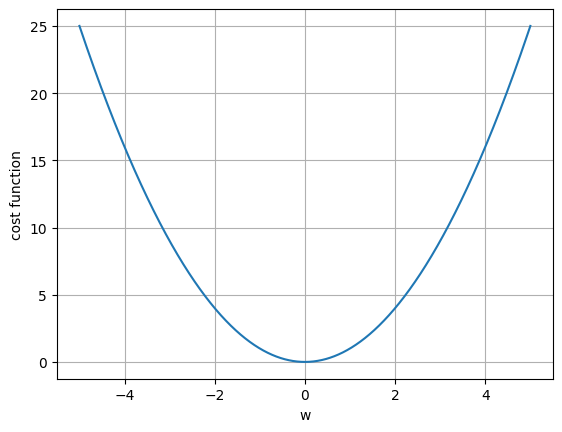

In [ ]:
w = np.arange(-5, 5, 0.0001)
f = w ** 2

plt.plot(w, f)
plt.grid()
plt.xlabel('w')
plt.ylabel('cost function')
plt.show()

In [ ]:
# 임의의 위치 w를 선택
w_init = 4

# 선택한 w에서 비용(손실) 함수의 gradient(접선의 기울기) 계산
gradient = 2 * w_init

# 처음 위치에서 기울기의 반대 방향으로 약간 이동
w_next = w_init - gradient * 0.1

w_next

3.2

In [ ]:
# 이동한 점에서 시작
w_init = w_next

# 선택한 w에서 비용(손실) 함수의 gradient(접선의 기울기) 계산
gradient = 2 * w_init

# 처음 위치에서 기울기의 반대 방향으로 약간 이동
w_next = w_init - gradient * 0.1

w_next

2.56

In [ ]:
def gradient_descent(learning_rate=0.1, max_iter=1_000, tolerance=0.0001):
    # 비용 함수 시각화
    w = np.arange(-5, 5, 0.0001)
    f = w ** 2
    plt.plot(w, f, color='DarkGray')

    # w가 얼마일 때 함수 f가 최소일까?
    # 임의의 w 값에서 시작
    w_init = -4
    # 시작 w의 위치를 점으로 표시
    plt.scatter(w_init, w_init ** 2, label='0')

    convergence = False
    for n in range(max_iter):
        # 시작값에서 접선의 기울기 계산
        gradient = 2 * w_init
        # gradient가 감소하는 방향으로 w 값을 변경.
        w_next = w_init - gradient * learning_rate
        # 이동한 점의 위치를 점으로 표시.
        plt.scatter(w_next, w_next ** 2, label=f'{n + 1}')
        # 반복을 계속 할 지 멈출 지를 결정.
        if np.abs(w_next - w_init) < tolerance:
            # 이동한 w의 위치와 처음 w 위치 사이의 거리가 0.0001 미만이면 반복을 멈춤.
            convergence = True
            break
        # 다음 이동 위치를 계산하기 위해서 바뀐 현재 위치를 새로운 초기 위치로 변경.
        w_init = w_next

    if convergence == False:
        print('최솟값으로 수렴하지 않았을 수도 있음.')
    plt.legend()
    plt.grid()
    plt.xlabel('w')
    plt.ylabel('cost function')
    plt.show()

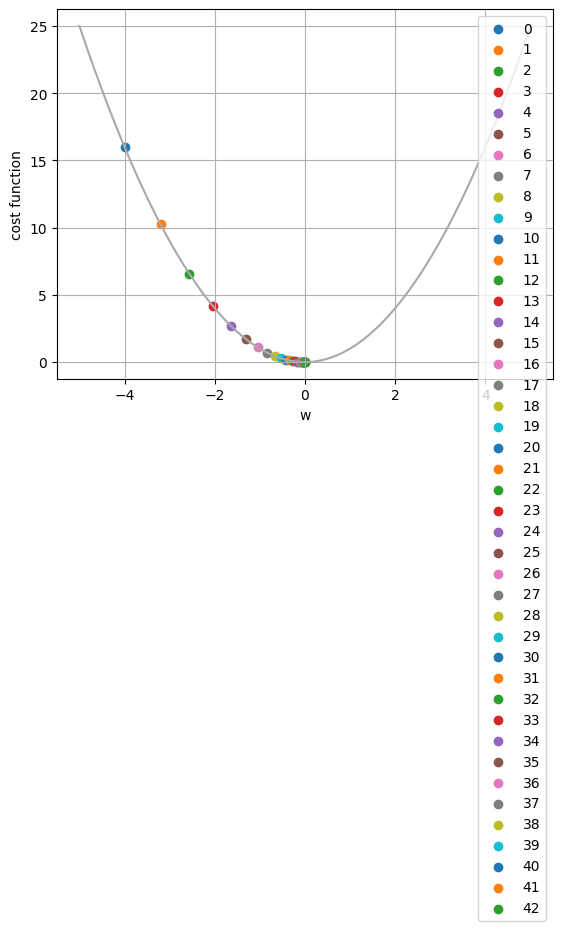

In [ ]:
gradient_descent()

최솟값으로 수렴하지 않았을 수도 있음.


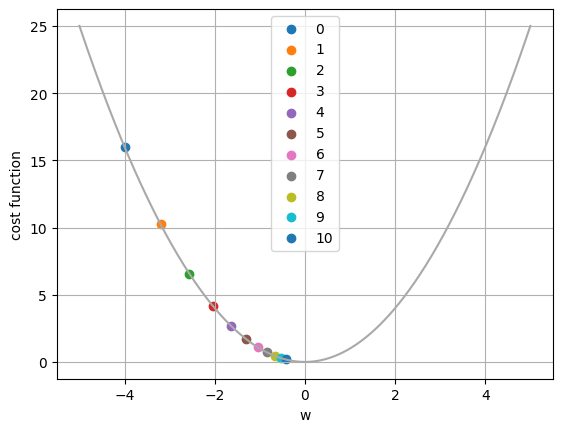

In [ ]:
gradient_descent(max_iter=10)

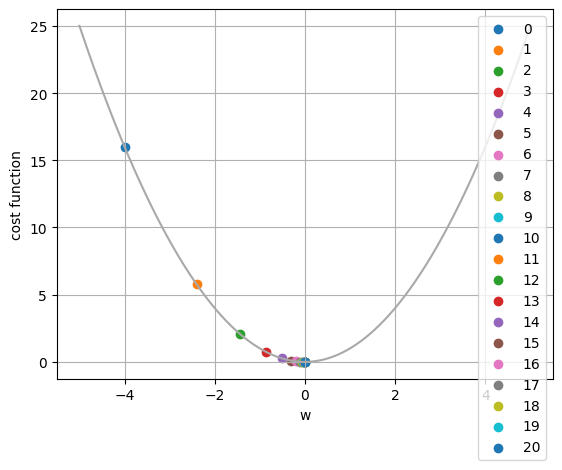

In [ ]:
gradient_descent(learning_rate=0.2)

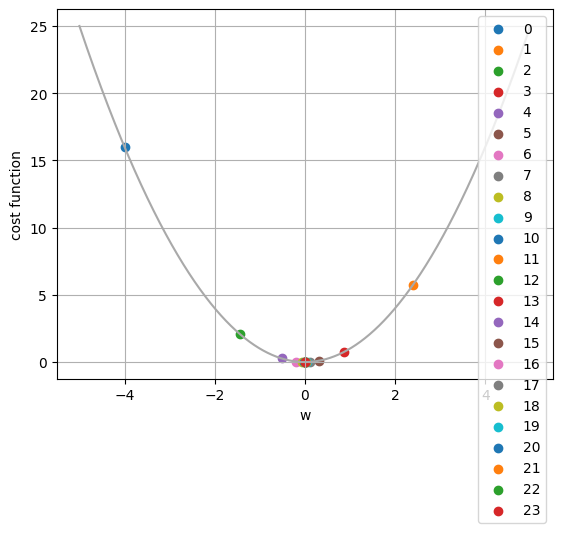

In [ ]:
gradient_descent(learning_rate=0.8)

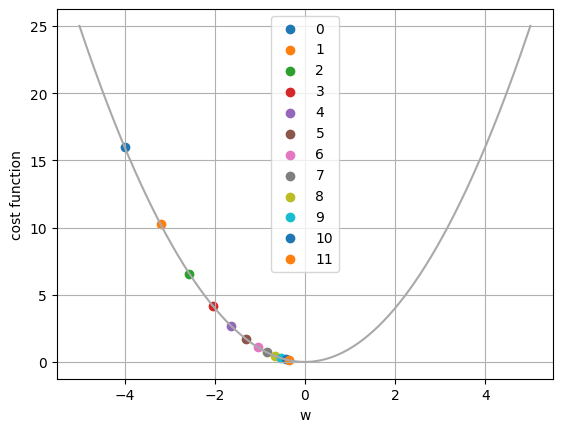

In [ ]:
gradient_descent(tolerance=0.1)

최솟값으로 수렴하지 않았을 수도 있음.


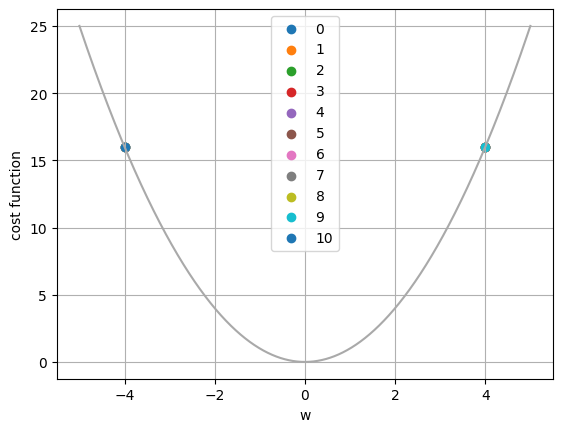

In [ ]:
gradient_descent(learning_rate=1.0, max_iter=10)

최솟값으로 수렴하지 않았을 수도 있음.


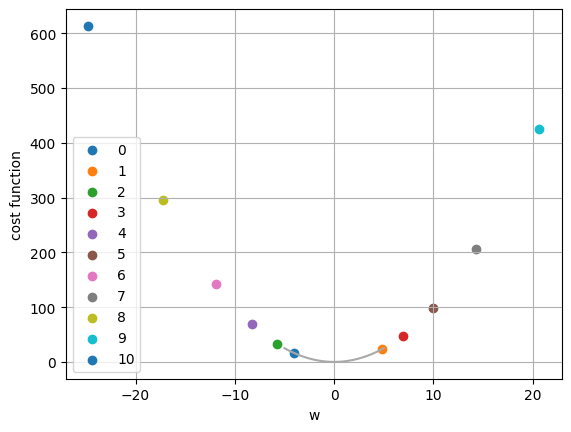

In [ ]:
gradient_descent(learning_rate=1.1, max_iter=10)

**학습률(learning rate) 하이퍼 파라미터**

*   학습률이 작은 경우에는 최솟값을 향해서 천천히 움직임.
*   학습률이 큰 경우에는 최솟값을 향해서 빠르게 또는 불안정하게 움직임.
*   학습률이 너무 작으면 최대 반복 횟수(max_iter) 안에서 최솟값으로 수렴(convergence)하지 못할 수도 있음.
    *   학습률을 키워줌.
    *   최대 반복 횟수를 늘려줌.
    *   수렴 반경(tolerance)을 늘려줌.
*   학습률이 너무 크면 수렴하지 못하고 발산(divergence)하는 경우가 생기기도 함.
    *   학습률을 줄여야 함.
*   ML 러닝 알고리즘들 중에서는 처음에는 학습률을 크게 하고, 에포크(epoch, 반복)가 진행될 때마다 학습률을 점점 줄여나가는 방식으로 데이터를 학습하는 알고리즘도 있음.

# SGD(Stochastic Gradient Descent, 확률적 경사 하강법)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

In [ ]:
# 데이터 셋
file_path = 'https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/fish.csv'

In [ ]:
fish = pd.read_csv(file_path)

In [ ]:
perch = fish[fish.Species == 'Perch']

In [ ]:
X = perch[perch.columns[2:]].values  # 특성 배열
y = perch['Weight'].values  # 타겟 배열

In [ ]:
# 훈련 셋/테스트 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
sgd = SGDRegressor(random_state=42)  # ML 모델 생성

In [ ]:
sgd.fit(X_train, y_train)  # ML 모델 훈련 -> 비용(손실) 함수를 최소로 만드는 w들을 찾음.

SGDRegressor(random_state=42)

In [ ]:
sgd.score(X_train, y_train)  # 훈련 셋에서의 결정계수(r2 score)

-1.042364600407224e+19

In [ ]:
sgd.score(X_test, y_test)  # 테스트 셋에의 결정계수

-1.1158958450602756e+19

훈련 셋의 샘플 개수가 너무 작아서 1,000번 반복(epoch)만으로는 최적의 값으로 수렴이 되지 않음.

해결 방법:
*   학습률을 키움.
*   반복 횟수를 늘려줌.
*   규제의 크기를 줄임.

*   SGDRegressor 사용
*   max_iter = 1_000_000_000
*   learning_rate = ['constant', 'invscaling', 'adaptive']
*   eta0 = [0.01, 0.1, 1.0, 10]
*   learning_rate와 eta0를 바꾸면서 훈련 셋과 테스트 셋에서의 결정계수를 출력

In [ ]:
max_iter = 1_000_000_000  # 최대 반복(epoch) 횟수
learning_rates = ['constant', 'invscaling', 'adaptive']  # 학습률 적용 방법
etas = [0.01, 0.1, 1.0, 10]  # 학습률 초깃값

for lr in learning_rates:
    for e in etas:
        sgd = SGDRegressor(max_iter=max_iter, learning_rate=lr, eta0=e, random_state=42)
        sgd.fit(X_train, y_train)
        train_score = sgd.score(X_train, y_train)
        test_score = sgd.score(X_test, y_test)
        print(f'learning rate={lr}, eta0={e}, train r2={train_score}, test r2={test_score}')

learning rate=constant, eta0=0.01, train r2=-2.695655118097932e+21, test r2=-2.8990417010445286e+21
learning rate=constant, eta0=0.1, train r2=-2.8084931644616035e+23, test r2=-3.0170828513330824e+23
learning rate=constant, eta0=1.0, train r2=-2.795200441965098e+25, test r2=-3.002899636056292e+25
learning rate=constant, eta0=10, train r2=-6.740506073825213e+26, test r2=-7.250016042296773e+26
learning rate=invscaling, eta0=0.01, train r2=-1.042364600407224e+19, test r2=-1.1158958450602756e+19
learning rate=invscaling, eta0=0.1, train r2=-1.1682646839470324e+21, test r2=-1.24940558290747e+21
learning rate=invscaling, eta0=1.0, train r2=-1.06534765882511e+22, test r2=-1.1721374953505718e+22
learning rate=invscaling, eta0=10, train r2=-1.5803262128809558e+24, test r2=-1.6381133418484844e+24
learning rate=adaptive, eta0=0.01, train r2=-1013829924893422.9, test r2=-2362489917705859.5
learning rate=adaptive, eta0=0.1, train r2=-3.916956516525734e+17, test r2=-5.65494901246058e+17
learning rat

Fish(농어) 데이터셋인 경우 샘플 갯수가 너무 적어서 확률적 경사 하강법이 좋은 결과를 주지 못함. 다른 머신 러닝 모델(예: LinearRegression, Ridge 등)을 고려하는 것이 더 낫다.